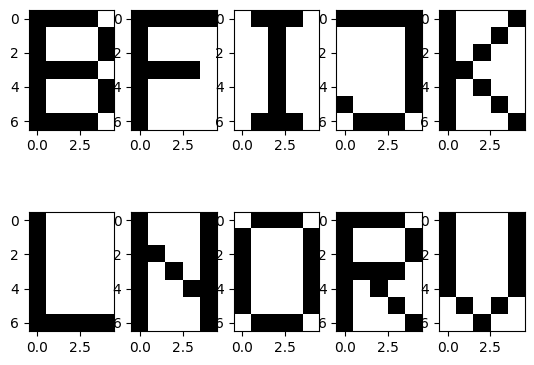

In [9]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.linear_model import Perceptron

def show(self, X):
      for i in range(len(X)):
            matrix = np.reshape(X[i], (7, 5))
            matrix = np.where(matrix == -1, 0, matrix)
            plt.subplot(2, 5, i+1)
            plt.imshow(matrix, cmap="Greys")
      plt.show()

def misclassified(self, X, y):
        counter = 0
        for i in range(len(X)):
            if y[i] != self.predict(X)[i]:
              counter += 1
        return counter

def damage(X, percent, seed=1):
    rgen = np.random.RandomState(seed)
    result = np.array(X)
    count = int(X.shape[1] * percent/100)

    for index_example in range(len(X)):
        order = np.sort(rgen.choice(X.shape[1], count, replace=False))
        for index_pixel in order:
            result[index_example][index_pixel] *= -1
    return result

Perceptron.show = show
Perceptron.misclassified = misclassified

net = Perceptron(eta0=0.05, max_iter=10, random_state=1)

df = pd.read_csv('letters.data',
                 header=None,
                 encoding='utf-8')

# my set: 1,5,8,9,10,11,13,14,17,21
# test set: 10,11,12,13,14,15,16,17,18,19

X = df.iloc[[1,5,8,9,10,11,13,14,17,21], :35].values
y = np.array([1,5,8,9,10,11,13,14,17,21])

net.show(X)

In [21]:
net.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(eta0=0.05, max_iter=10, random_state=1)

In [22]:
net.predict(X)

array([ 1,  5,  8,  9, 10, 11, 13, 14, 17, 21])

In [11]:
net.misclassified(X, y)

0

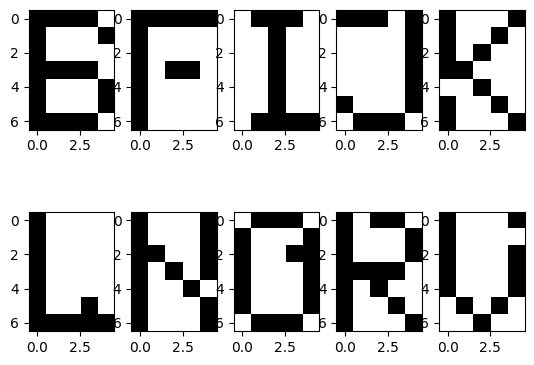

In [12]:
damaged5 = damage(X, 5)
damaged15 = damage(X, 15)
damaged40 = damage(X, 40)
net.show(damaged5)

In [13]:
net.predict(damaged5)

array([ 1,  5,  8,  9, 10, 11, 13, 14, 17, 21])

In [14]:
net.misclassified(damaged5, y)

0

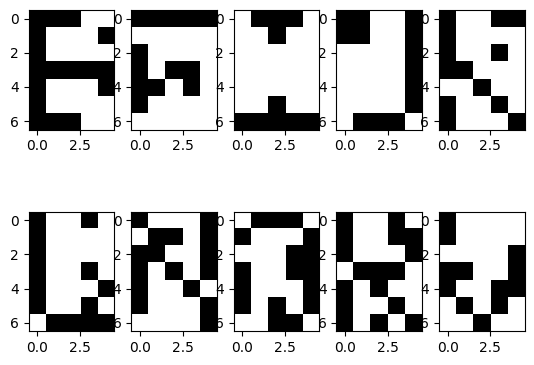

In [15]:
net.show(damaged15)

In [16]:
net.predict(damaged15)

array([ 5,  5,  8,  9,  5, 11, 13, 14, 17, 21])

In [17]:
net.misclassified(damaged15, y)

2

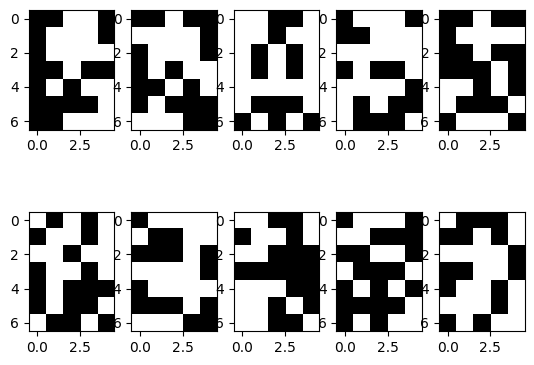

In [18]:
net.show(damaged40)

In [19]:
net.predict(damaged40)

array([ 5, 17,  5,  5, 21,  8, 13,  1, 21,  5])

In [20]:
net.misclassified(damaged40, y)

9